###  ================ IMERSÃO DE DADOS COM PYTHON 2025 - ALURA ===============
### 📘 Aula 3 - Visualização dos Dados                                     
### Autor: Alfredo Cezar Benedetti                              
### Data: 07/08/2025  
### Descrição: Este notebook realiza a Visualização dos Dados, este projeto é a terceita parte da Imersão da Alura. Na primeira aula fiz as primeiras análises, analisando se na Base de Dados tinha valores nulos, algumas Traduções de Colunas e Valores. Na segunda aula, fiz todo o tratamento dos Dados necessários para chegar até aqui na visualição e exibição gráficas.
### =================================================================

In [1]:
# Até o momento trabalhando apenas com a biblioteca PANDAS
import pandas as pd

# Nesta aula iremos trabalhar com 2 novas bibliotecas
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando a Base de Dados da Aula 02
BaseDados = pd.read_csv("BaseDados_Aula02.csv")

In [3]:
# Exibindo as primeiras linhas da Base de Dados Tratada na segunda aula
BaseDados.head()

,Ano,Senioridade,Contrato,Cargo,Salário,Moeda,USD,Residência,Remoto,Empresa,Porte_Empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


### A partir de agora, iremos trabalhar com as novas bibliotecas.

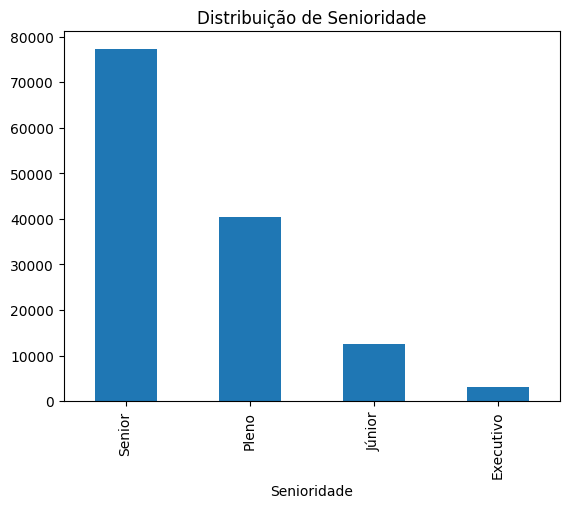

In [4]:
# Exibindo a frequência de cada categoria na coluna SENIORIDADE é mencionada.

### Explicação passo a passo:
### BaseDados["Senioridade"]: acessa a coluna com os níveis de senioridade dos profissionais.
### .value_counts(): conta quantas vezes cada categoria aparece (ex: Júnior, Pleno, Sênior).
### .plot(kind="bar", ...): cria um gráfico de barras com essas contagens.
### title="...": define o título do gráfico.

BaseDados["Senioridade"].value_counts().plot(kind="bar", title="Distribuição de Senioridade")
plt.show()

<Axes: xlabel='Senioridade', ylabel='USD'>

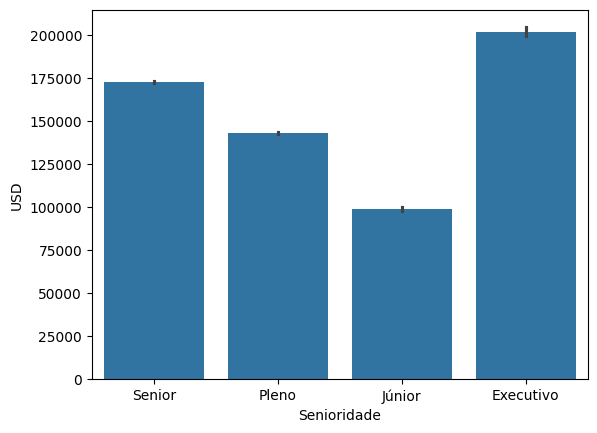

In [5]:
# Criando um gráfico de barras com o valor médio para cada nível de Senioridade
# está tentando criar um gráfico de barras com o valor médio de USD (salário, provavelmente) 
# para cada nível de Senioridade. 

### O seaborn.barplot por padrão mostra a média de y para cada categoria de x.

### O que esse gráfico mostra:
### No eixo X: os níveis de senioridade (ex: Júnior, Pleno, Sênior).
### No eixo Y: o valor médio de USD para cada nível.
### As barras representam a média, e geralmente vêm com uma linha de erro (intervalo de confiança).

sns.barplot(data = BaseDados, x = "Senioridade", y = "USD")

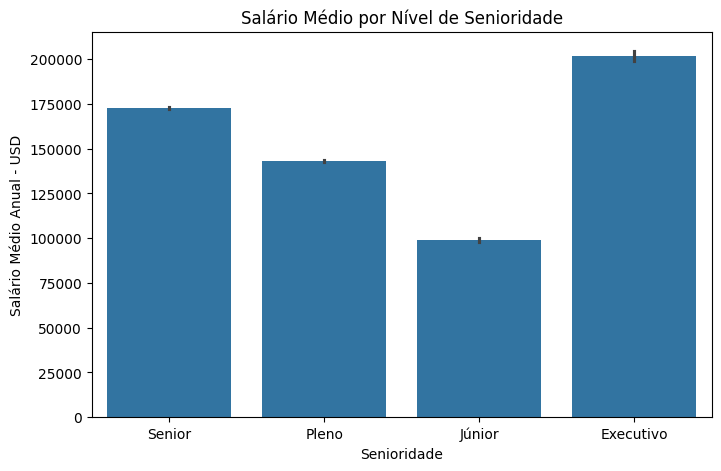

In [6]:
# Criando um gráfico:

### plt.figure(figsize = (8,5)) - Criando as dimensões da imagem a ser criada
### sns.barplot(data = BaseDados, x = "Senioridade", y = "USD") - vai gerar um gráfico de barras com a média dos salários (USD) para cada 
### categoria de Senioridade, usando o seaborn. Por padrão, ele calcula a média de y para cada valor único de x.

plt.figure(figsize = (8,5))
sns.barplot(data = BaseDados, x = "Senioridade", y = "USD")
plt.title("Salário Médio por Nível de Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Médio Anual - USD")
plt.show()

In [7]:
# O código abaixo cria uma ordenação personalizada com base na média salarial (USD) por nível de Senioridade, do maior para o menor.

### Etapas explicadas:
### BaseDados.groupby("Senioridade") - Agrupa o DataFrame BaseDados por valores únicos da coluna "Senioridade".
### ["USD"] - Seleciona a coluna "USD" dentro de cada grupo.
### No caso, estamos interessados apenas nos salários (em dólares) para cada nível de senioridade.
### .mean() - Calcula a média salarial para cada grupo de senioridade.
### .sort_values(ascending=False) - Ordena essa série de médias em ordem decrescente.
### Ou seja, do maior salário médio para o menor.
### .index - Extrai apenas os rótulos dos índices (os nomes dos níveis de senioridade).
### Resultado: uma lista ordenada com os níveis de senioridade, do mais bem pago ao menos.

OrdemSenioridade = BaseDados.groupby("Senioridade")["USD"].mean().sort_values(ascending = False).index
OrdemSenioridade

Index(['Executivo', 'Senior', 'Pleno', 'Júnior'], dtype='object', name='Senioridade')

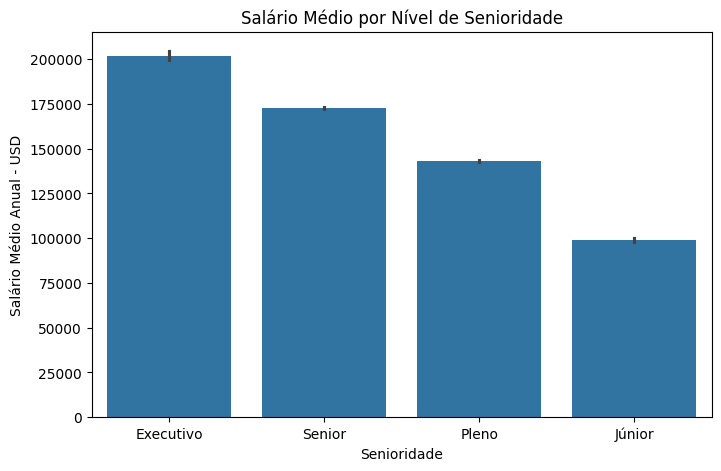

In [8]:
# Criando um gráfico:

### plt.figure(figsize = (8,5)) - Criando as dimensões da imagem a ser criada
### sns.barplot(data = BaseDados, x = "Senioridade", y = "USD") - vai gerar um gráfico de barras com a média dos salários (USD) para cada 
### categoria de Senioridade, usando o seaborn. Por padrão, ele calcula a média de y para cada valor único de x.

plt.figure(figsize = (8,5))
sns.barplot(data = BaseDados, x = "Senioridade", y = "USD", order = OrdemSenioridade)
plt.title("Salário Médio por Nível de Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Médio Anual - USD")
plt.show()

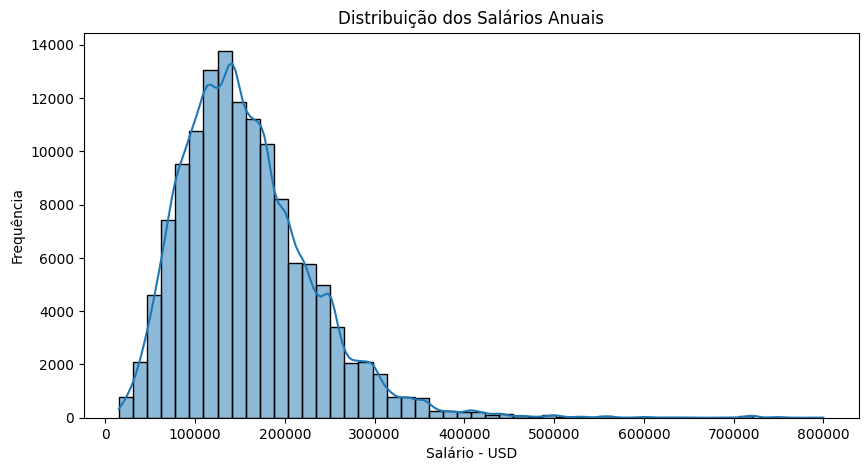

In [9]:
# Criando um gráfico:

### plt.figure(figsize = (10,5)) - Cria uma figura com tamanho 10x5 polegadas. Isso define o espaço do gráfico.
### sns.histplot(BaseDados["USD"], bins = 50, kde=True) - Gera um histograma da coluna "USD" (salários).
### bins=50: divide os salários em 50 faixas (intervalos).
### kde=True: adiciona uma curva de densidade (Kernel Density Estimate) para suavizar a distribuição.

plt.figure(figsize = (10,5))
sns.histplot(BaseDados["USD"], bins = 50, kde=True)
plt.title("Distribuição dos Salários Anuais")
plt.xlabel("Salário - USD")
plt.ylabel("Frequência")
plt.show()

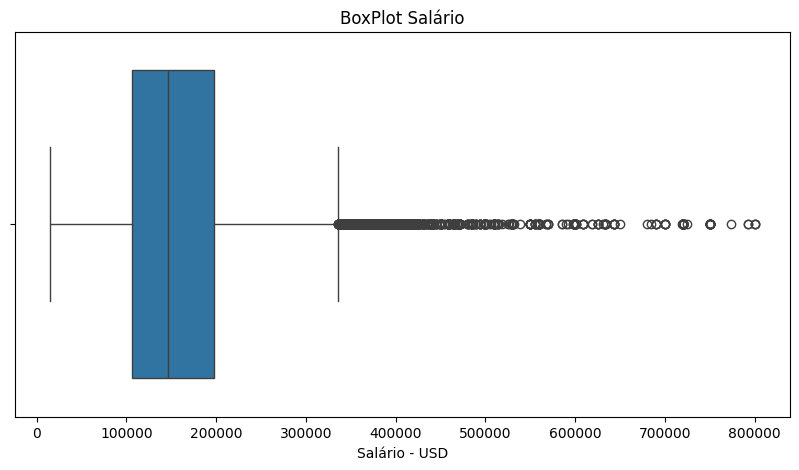

In [10]:
# Criando um gráfico:

### plt.figure(figsize = (10,5)) - Cria uma figura com tamanho 10x5 polegadas. Isso define o espaço do gráfico.
### sns.boxplot(x = BaseDados["USD"]) - Gera um boxplot da coluna "USD" (salários).
### O boxplot mostra:
### Mediana (linha central da caixa)
### Quartis (limites da caixa)
### Valores extremos (linhas horizontais chamadas “bigodes”)
### Outliers (pontos fora dos bigodes)

plt.figure(figsize=(10,5))
sns.boxplot(x = BaseDados["USD"])
plt.title("BoxPlot Salário")
plt.xlabel("Salário - USD")
plt.show()

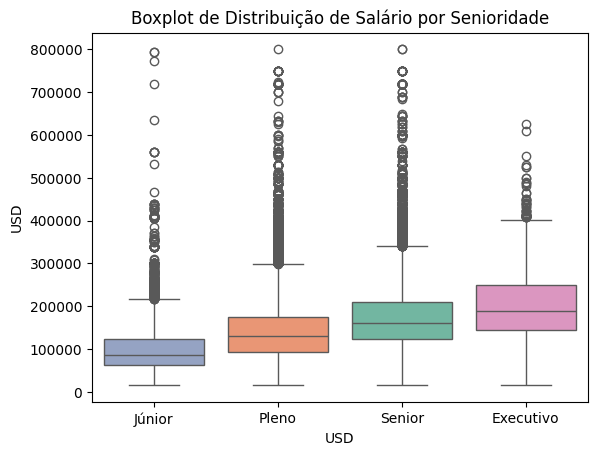

In [11]:
# Criando um gráfico

### OrdemSenioridade = ["Júnior","Pleno","Senior","Executivo"] - Define uma ordem personalizada para os níveis de senioridade, 
### útil para organizar o gráfico de forma lógica.
### sns.boxplot(x = "Senioridade", y = "USD", data = BaseDados, order = OrdemSenioridade) - Gera um boxplot comparando a distribuição 
### salarial (USD) entre os diferentes níveis de Senioridade.
### Usa a ordem definida para exibir os níveis de forma coerente (do mais júnior ao mais executivo).
### palette="Set2"	Aplica uma paleta de cores específica (Set2 é suave e colorida).
### hue="Senioridade"	Aplica cores diferentes para cada categoria de "Senioridade".

OrdemSenioridade = ["Júnior","Pleno","Senior","Executivo"]
plt.Figure(figsize = (10,5))
sns.boxplot(x = "Senioridade", y = "USD", data = BaseDados, order = OrdemSenioridade, palette = "Set2", hue = "Senioridade")
plt.title("Boxplot de Distribuição de Salário por Senioridade")
plt.xlabel("USD")
plt.show()

In [12]:
# Calculando a média salarial por senioridade
media_salario_senioridade = BaseDados.groupby("Senioridade")["USD"].mean().sort_values(ascending = False).reset_index()

# Criando o gráfico de barras com Plotly
fig = px.bar(
    media_salario_senioridade,
    x="Senioridade",
    y="USD",
    title="Média Salarial por Senioridade",
    labels={"USD": "Salário Médio (USD)", "Senioridade": "Nível de Senioridade"},
    color="Senioridade"
)
fig.show()

In [14]:
# Calculando a média salarial por senioridade
ContagemRemoto = BaseDados["Remoto"].value_counts().reset_index()
ContagemRemoto.columns = ["Tipo de Trabalho","Quantidade"]

# Criando o gráfico de barras com Plotly
fig = px.pie(
    ContagemRemoto,
    names  = "Tipo de Trabalho",
    values = "Quantidade",
    title  = "Proporção do Tipo de Trabalho",
#    hole = 0.5
)

fig.update_traces(textinfo='percent+label')

fig.show()